In [1]:
import numpy as np
import matplotlib.pyplot as plt
from FirstGeneration import *

In [2]:
def calculate_cost_coefficient_1G_rev(num_points, L_att, eta_min, L_tot,
                                   epsilon_G, xi, t0, seed, N, M_arrow, protocol_switch=True):
    """
    Calculates cost efficiency (C / L_tot) for first-generation repeaters,
    compares Deutsch and Dür, selects optimal. η_c is log-spaced (right dense).

    Returns:
    - optimal_costs: list of min(cost_D, cost_Dr) / L_tot per eta_c
    - etas: corresponding eta_c values (right-dense)
    - protocol_labels: list of 'Deutsch' or 'Dür' indicating better protocol
    """
    # Right-dense distribution for η_c (denser near 1)
    linear = np.linspace(0, 1, num_points)
    eta_vals = eta_min + (1 - eta_min) * (linear ** (1/3))  # adjust 1/3 for how steep the density is

    L0 = L_tot / (2 ** N)
    T0 = L0 / 2e5  # c = 2e5 km/s

    i = M_arrow[N]
    j = N
    niter = 30

    optimal_costs = []
    etas = []
    protocol_labels = []

    for eta_c in eta_vals:
        # Deutsch
        total_keyrate_D = 0
        for k in range(niter):
            a, b, c_val, d = get_final_state(i, j, N, M_arrow,
                                             epsilon_G=epsilon_G, xi=xi,
                                             seed=seed + k, protocol=1)
            qber = compute_QBER(a, b, c_val, d)
            T_deu = compute_T(N, M_arrow, epsilon_G, xi, seed + k,
                              eta_c, L_att, t0, T0, L0, protocol=1)
            total_keyrate_D += key_rate(qber, T_deu)
        R_D = total_keyrate_D / niter
        Z_D = 2 ** sum(M_arrow)
        C_D = 2 ** (N + 1) * Z_D / R_D if R_D > 0 else np.inf
        Ceff_D = C_D / L_tot

        # Dür
        total_keyrate_Dr = 0
        for k in range(niter):
            a, b, c_val, d = get_final_state(i, j, N, M_arrow,
                                             epsilon_G=epsilon_G, xi=xi,
                                             seed=seed + k, protocol=2, seed2=123 + k)
            qber = compute_QBER(a, b, c_val, d)
            T_dur = compute_T(N, M_arrow, epsilon_G, xi, seed + k,
                              eta_c, L_att, t0, T0, L0, protocol=2, seed2=123 + k)
            total_keyrate_Dr += key_rate(qber, T_dur)
        R_Dr = total_keyrate_Dr / niter
        Z_Dr = N + 2 - sum(1 for m in M_arrow if m == 0)
        C_Dr = 2 ** (N + 1) * Z_Dr / R_Dr if R_Dr > 0 else np.inf
        Ceff_Dr = C_Dr / L_tot

        # Compare
        if Ceff_D < Ceff_Dr:
            optimal_costs.append(Ceff_D)
            protocol_labels.append("Deutsch")
        else:
            optimal_costs.append(Ceff_Dr)
            protocol_labels.append("Dür")

        etas.append(eta_c)

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(etas, optimal_costs, marker='o', label="Optimal (Deutsch vs. Dür)")
    plt.xlabel("Coupling efficiency η_c")
    plt.ylabel("Cost Efficiency C / L_tot")
    plt.yscale("log")
    plt.title("Cost Efficiency vs Coupling Efficiency (1G Repeater)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return optimal_costs, etas, protocol_labels


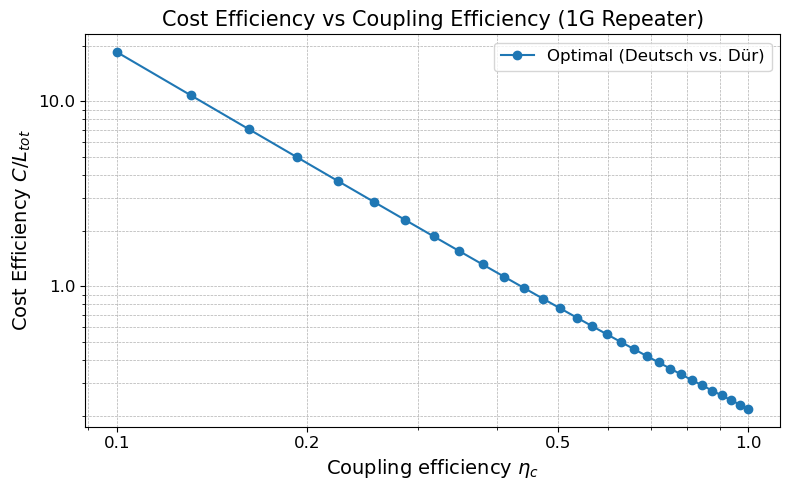

([18.432686558109147,
  10.749236328328468,
  7.038153110245581,
  4.967486664296801,
  3.695661777513467,
  2.8589624850985214,
  2.27936720722168,
  1.861391445398186,
  1.5500880186137387,
  1.3120208698622369,
  1.1258972461716126,
  0.9776356666869765,
  0.8576220279999673,
  0.7591108027015085,
  0.6772560481970932,
  0.6085038522594892,
  0.5501999640117637,
  0.5003297181196347,
  0.45734162636770537,
  0.4200252316001479,
  0.3874249543686786,
  0.35877830239699593,
  0.3334708759020687,
  0.3110031467428252,
  0.2909656176369861,
  0.27302002982488777,
  0.2568849927923728,
  0.24232488561513876,
  0.2291412055639181,
  0.2171657661382736],
 [0.1,
  0.1310344827586207,
  0.16206896551724137,
  0.19310344827586207,
  0.22413793103448276,
  0.25517241379310346,
  0.28620689655172415,
  0.3172413793103448,
  0.34827586206896555,
  0.3793103448275862,
  0.41034482758620694,
  0.4413793103448276,
  0.4724137931034482,
  0.503448275862069,
  0.5344827586206896,
  0.5655172413793104

In [32]:
N = 5
M_arrow = [0, 0, 3, 0, 3, 0]

epsilon_G = 0.01
xi = epsilon_G / 4

calculate_cost_coefficient_1G(
    num_points=30,
    L_att=20,
    eta_min=0.1,
    L_tot=1000,
    epsilon_G=epsilon_G,
    xi=xi,
    t0=1e-6,
    seed=20,
    N=N,
    M_arrow=M_arrow)

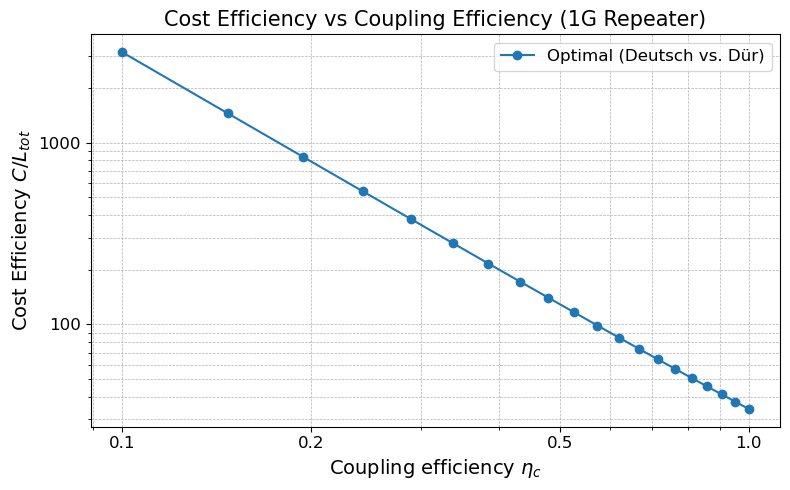

([3158.0862585853392,
  1455.6180431619287,
  834.75148319282,
  541.0112643170573,
  379.2461818510107,
  280.7847565105428,
  216.43907088422222,
  172.09221030995454,
  140.23994502552367,
  116.59406768183109,
  98.5598078300043,
  84.49239886181358,
  73.30832085785993,
  64.27023611212365,
  56.86227228554088,
  50.71474287727547,
  45.55711392779081,
  41.18772304598774,
  37.45376293464897,
  34.23773727429723],
 [0.1,
  0.1473684210526316,
  0.19473684210526315,
  0.24210526315789474,
  0.2894736842105263,
  0.33684210526315794,
  0.38421052631578945,
  0.43157894736842106,
  0.4789473684210527,
  0.5263157894736842,
  0.5736842105263158,
  0.6210526315789474,
  0.6684210526315789,
  0.7157894736842105,
  0.7631578947368421,
  0.8105263157894737,
  0.8578947368421053,
  0.9052631578947369,
  0.9526315789473684,
  1.0],
 ['Dür',
  'Dür',
  'Dür',
  'Dür',
  'Dür',
  'Dür',
  'Dür',
  'Dür',
  'Dür',
  'Dür',
  'Dür',
  'Dür',
  'Dür',
  'Dür',
  'Dür',
  'Dür',
  'Dür',
  'Dür'

In [31]:
N = 8
M_arrow = [1, 1, 1, 1, 0, 0, 3, 1, 0]

epsilon_G = 0.01
xi = epsilon_G / 4

calculate_cost_coefficient_1G(
    num_points=20,
    L_att=20,
    eta_min=0.1,
    L_tot=10000,
    epsilon_G=epsilon_G,
    xi=xi,
    t0=1e-6,
    seed=59,
    N=N,
    M_arrow=M_arrow)

In [26]:
best_Ceff = np.inf
best_result = None

def generate_M_arrow_seed(N, max_rounds=5, seed=None):
    if seed is not None:
        np.random.seed(seed)
    else:
        np.random.seed(N + 42)  # fallback seed for reproducibility

    M_arrow = [np.random.randint(0, max_rounds + 1) for _ in range(N + 1)]
    return M_arrow

def generate_M_arrow_random(N, max_rounds=5):
    M_arrow = [np.random.randint(0, max_rounds + 1) for _ in range(N + 1)]
    return M_arrow


In [28]:
def run_best_cost_search(L_tot, max_rounds=3, trials=500):
    best_Ceff = float("inf")
    best_result = {}

    for N in range(1, 12):
        print(f"Trying N = {N} with L_tot = {L_tot}...")
        
        for trial in range(trials):
            seed_val = np.random.randint(100)
            M_arrow = generate_M_arrow_random(N, max_rounds=max_rounds)
            
            costs, etas, labels = calculate_cost_coefficient_1G(
                num_points=1,
                L_att=20,
                eta_min=1,
                L_tot=L_tot,
                epsilon_G=0.01,
                xi=0.01 / 4,
                t0=1e-6,
                seed=seed_val,
                N=N,
                M_arrow=M_arrow,
                plot=False
            )
            
            min_ceff = min(costs)
            
            if min_ceff < best_Ceff:
                best_Ceff = min_ceff
                best_result = {
                    "N": N,
                    "M_arrow": M_arrow,
                    "min_cost_eff": min_ceff,
                    "eta_c_at_min": etas[costs.index(min_ceff)],
                    "protocol": labels[costs.index(min_ceff)],
                    "seed": seed_val,
                    "L_tot": L_tot
                }

    print(f"\n=== Best Cost Efficiency Result when L_tot = {L_tot} ===")
    print(f"N = {best_result['N']}")
    print(f"M_arrow = {best_result['M_arrow']}")
    print(f"Min Cost Efficiency = {best_result['min_cost_eff']:.4e}")
    print(f"At η_c = {best_result['eta_c_at_min']:.3f}, Protocol: {best_result['protocol']}")
    print(f"Seed = {best_result['seed']}")
    print("-" * 60)
    return best_result


In [29]:
result_1000 = run_best_cost_search(L_tot=1000)
result_10000 = run_best_cost_search(L_tot=10000)

Trying N = 1 with L_tot = 1000...
Trying N = 2 with L_tot = 1000...
Trying N = 3 with L_tot = 1000...
Trying N = 4 with L_tot = 1000...
Trying N = 5 with L_tot = 1000...
Trying N = 6 with L_tot = 1000...
Trying N = 7 with L_tot = 1000...
Trying N = 8 with L_tot = 1000...
Trying N = 9 with L_tot = 1000...
Trying N = 10 with L_tot = 1000...
Trying N = 11 with L_tot = 1000...

=== Best Cost Efficiency Result when L_tot = 1000 ===
N = 5
M_arrow = [1, 1, 1, 1, 0, 0]
Min Cost Efficiency = 4.2394e-01
At η_c = 1.000, Protocol: Dür
Seed = 59
------------------------------------------------------------
Trying N = 1 with L_tot = 10000...
Trying N = 2 with L_tot = 10000...
Trying N = 3 with L_tot = 10000...
Trying N = 4 with L_tot = 10000...
Trying N = 5 with L_tot = 10000...
Trying N = 6 with L_tot = 10000...
Trying N = 7 with L_tot = 10000...
Trying N = 8 with L_tot = 10000...
Trying N = 9 with L_tot = 10000...
Trying N = 10 with L_tot = 10000...
Trying N = 11 with L_tot = 10000...

=== Best Cos